# Iris Species Classification with Machine Learning

# Domain knowledge

 1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("Iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Preprocessing

In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.columns = ["sl","sw","pl","pw","species"]
df

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'sl'}>,
        <AxesSubplot:title={'center':'sw'}>],
       [<AxesSubplot:title={'center':'pl'}>,
        <AxesSubplot:title={'center':'pw'}>]], dtype=object)

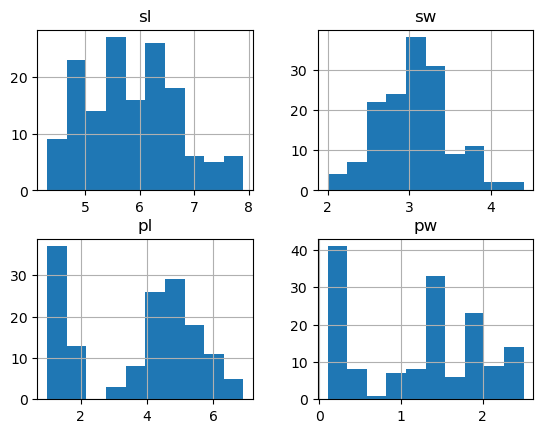

In [10]:
df.hist()

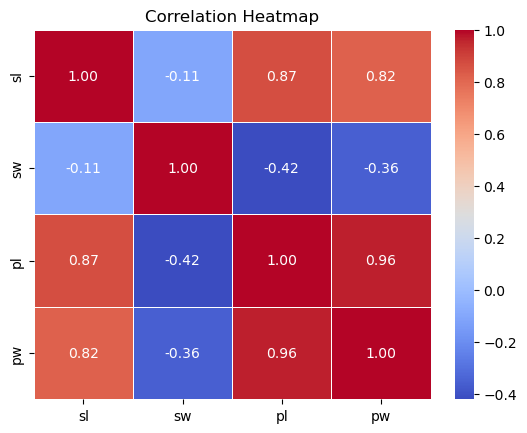

In [11]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

What are the unique classes (species) in the Iris dataset, and how can we count the number of instances for each class?

In [12]:
unique_classes = df.iloc[:, -1].unique()
class_counts = df.iloc[:, -1].value_counts()
print("Unique Classes (Species):", unique_classes)
print("\nClass Counts:")
print(class_counts)


Unique Classes (Species): ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Class Counts:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


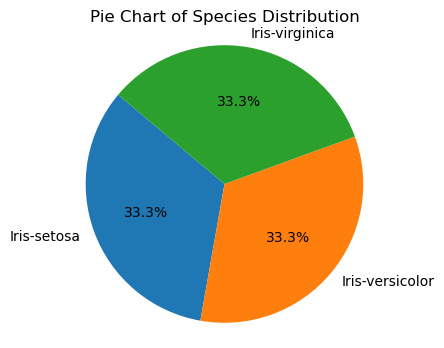

In [13]:
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=unique_classes, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Species Distribution')
plt.axis('equal')
plt.show()


Different species of Iris flowers with 50 rows of petal and sepal dimensions each

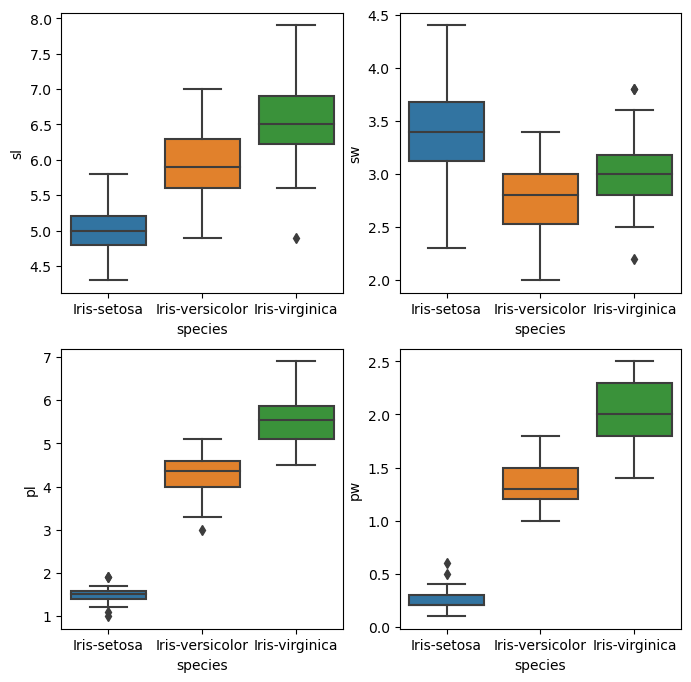

In [14]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.boxplot(x= df.species,y=df.sl)
plt.subplot(2,2,2)
sns.boxplot(x= df.species,y=df.sw)
plt.subplot(2,2,3)
sns.boxplot(x= df.species,y=df.pl)
plt.subplot(2,2,4)
sns.boxplot(x= df.species,y=df.pw)
plt.show()

In [15]:
le = LabelEncoder()

df["species"] = le.fit_transform(df["species"])

In [16]:
df.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df.sample(10)

,sl,sw,pl,pw,species
26,5.0,3.4,1.6,0.4,0
99,5.7,2.8,4.1,1.3,1
47,4.6,3.2,1.4,0.2,0
113,5.7,2.5,5.0,2.0,2
42,4.4,3.2,1.3,0.2,0
122,7.7,2.8,6.7,2.0,2
143,6.8,3.2,5.9,2.3,2
59,5.2,2.7,3.9,1.4,1
65,6.7,3.1,4.4,1.4,1
118,7.7,2.6,6.9,2.3,2


# Model Building 

In [18]:
y = df["species"]
X = df.drop('species', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Testing different model to see which model is siutable for our data set

# Logistic Regression

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{report}')

Accuracy: 1.0
Confusion Matrix:
[[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



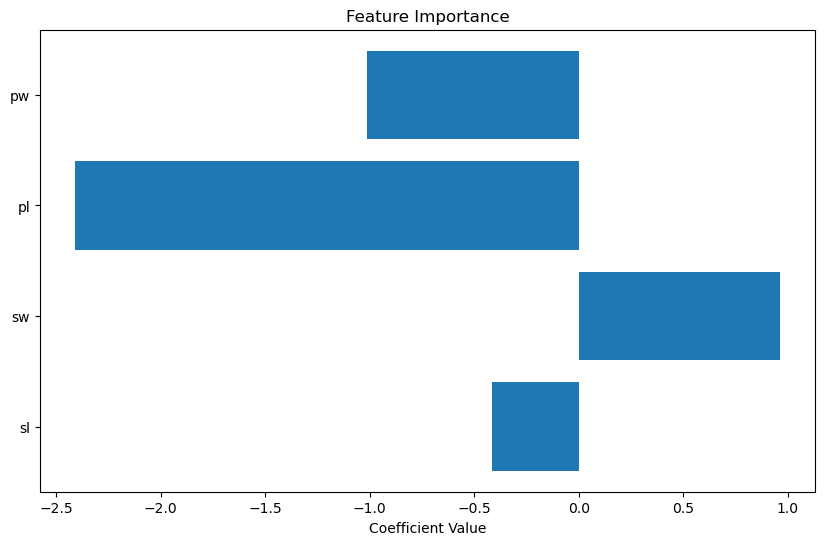

In [21]:
feature_importance = model.coef_[0]
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()


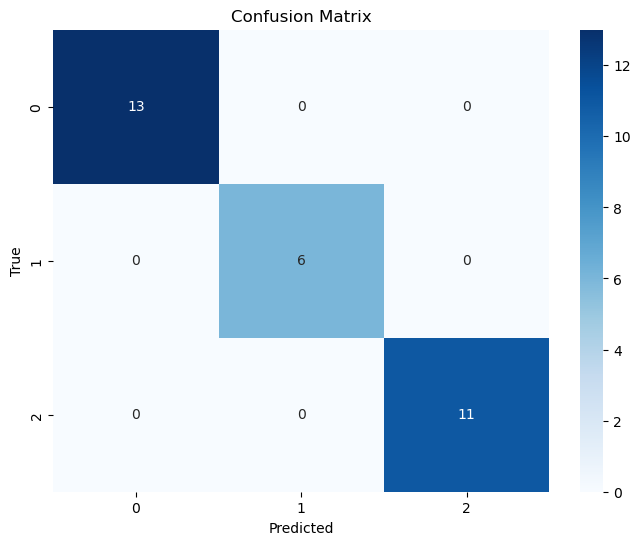

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# RandomForest Classifier

In [23]:
model = RandomForestClassifier(n_estimators=200, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



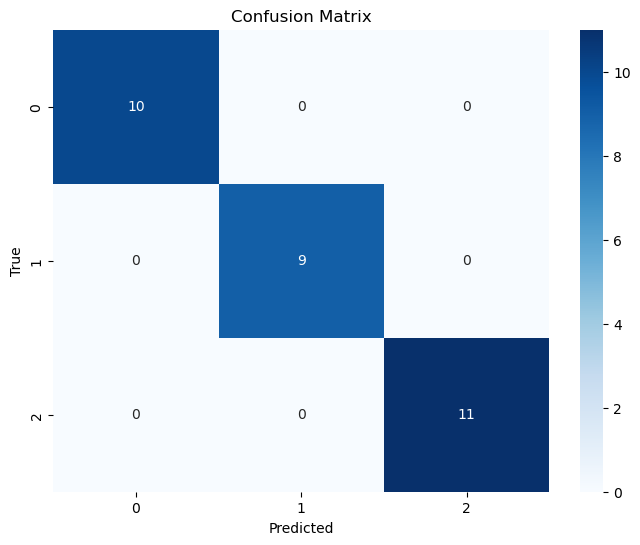

In [25]:
confusion = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Conclusion:

The analysis of the Iris dataset using Random Forest Classifier and Logistic Regression yielded exceptional results with an accuracy of 1.0 for both models. This suggests that the features 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' are highly informative and discriminatory for classifying iris flowers into their respective species. The absence of misclassifications in the confusion matrices and perfect precision, recall, and F1-scores indicate the robust performance of both models. 

### Save predicited data to CSV 

In [26]:
predictions_df = pd.DataFrame({'predicted_species': predictions})
result_df = pd.concat([X_test, predictions_df], axis=1)
result_df.to_csv('Iris_prediction.csv', index=False)
